In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Datathon/ProductClustered.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(file_path)

In [ ]:
df = df[['product_id', 'Total_Quantity_In_Inventory', 'Total_Sold_Quantity', 'Average_Cost_Price']]

In [ ]:
df = df[df['product_id'].notna()]
df.head(10)

,product_id,Total_Quantity_In_Inventory,Total_Sold_Quantity,Average_Cost_Price
0,0018eddc01544dbc9857e8e26ea50b61XNH31,2520,2520,4.658286e+10
1,009f0f0eee554bcd9db80085537ddaceXMN25,4320,4320,8.759600e+10
2,0040eff91798499697a833c9b56deac9DEN35,16200,16200,1.411847e+11
3,0021db9bde68471694ecff538475bd56XAM40,24480,20880,2.692001e+11
4,00329f6178fa4fea83077f36e4b835bcREU41,54720,27360,2.479889e+11
5,00681d6c3efd4f0fb3bc53ab2f7b65f7CAM27,54000,18000,9.330422e+10
6,00134b14581340878572570a534ec1a3DEN39,60480,34560,1.328383e+11
7,00874e03d3424032957bbe1105f23941DOO42,146520,45600,4.478501e+11
8,002d0608fcb547fd82bc8c3f4dc3957eDOO31,71280,49680,1.864551e+11
9,0084d15f56db427d8a56dac2399e001cREU39,960,480,2.737310e+11


In [ ]:
df.describe()

,Total_Quantity_In_Inventory,Total_Sold_Quantity,Average_Cost_Price
count,1.153700e+04,1.153700e+04,1.153700e+04
mean,1.063637e+06,2.211173e+05,2.523898e+11
std,2.734880e+07,8.853957e+05,2.046263e+11
min,3.600000e+02,-7.542000e+05,-4.692000e+11
25%,1.104000e+04,8.280000e+03,1.311595e+11
50%,6.084000e+04,4.200000e+04,1.980424e+11
75%,3.532800e+05,1.848000e+05,2.980726e+11
max,1.652666e+09,3.063528e+07,3.528455e+12


<ipython-input-28-9d626225661b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Quantity_In_Inventory'])


Text(0.5, 0, 'Total Quantity in Inventory')

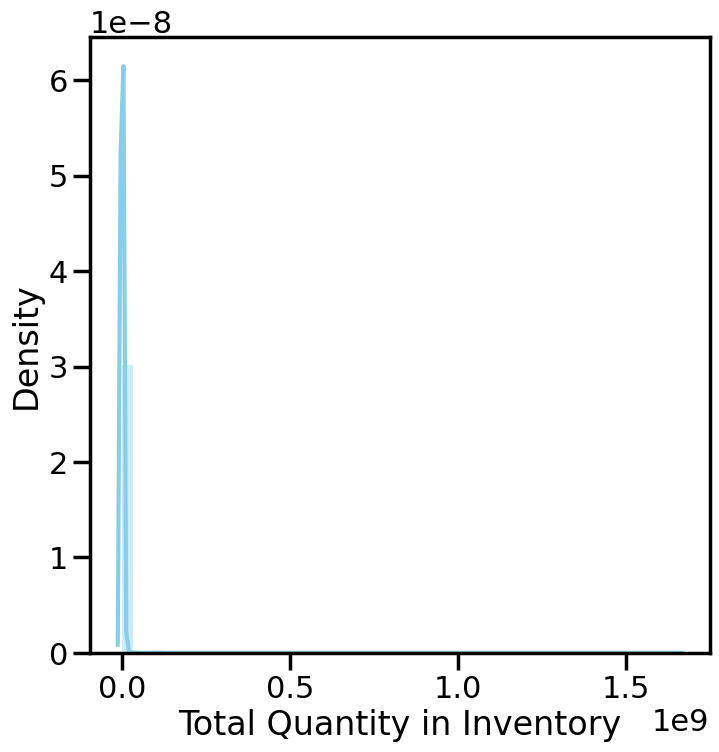

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['skyblue'])
sns.distplot(df['Total_Quantity_In_Inventory'])
plt.xlabel('Total Quantity in Inventory')

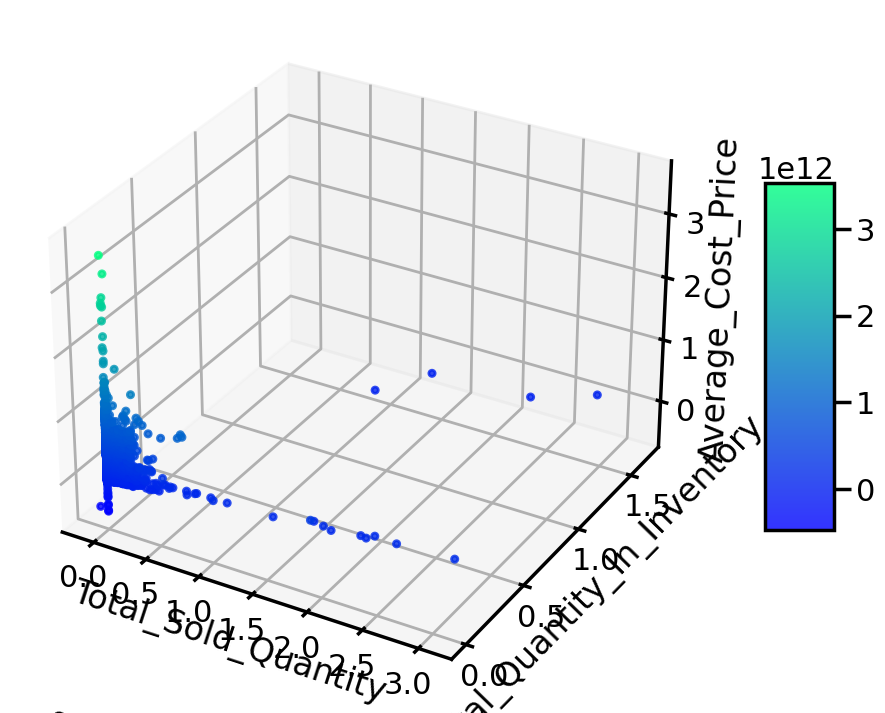

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
y = df['Total_Quantity_In_Inventory']
x = df['Total_Sold_Quantity']
z = df['Average_Cost_Price']
ax.set_xlabel('Total_Sold_Quantity')
ax.set_ylabel('Total_Quantity_In_Inventory')
ax.set_zlabel('Average_Cost_Price')
# Creating color map
my_cmap = plt.get_cmap('winter')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

<ipython-input-30-069ae4e80358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Sold_Quantity'], ax = ax[0])
<ipython-input-30-069ae4e80358>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Quantity_In_Inventory'], ax = ax[1])
<ipython-input-30-069ae4e80358>:4: UserWarning: 

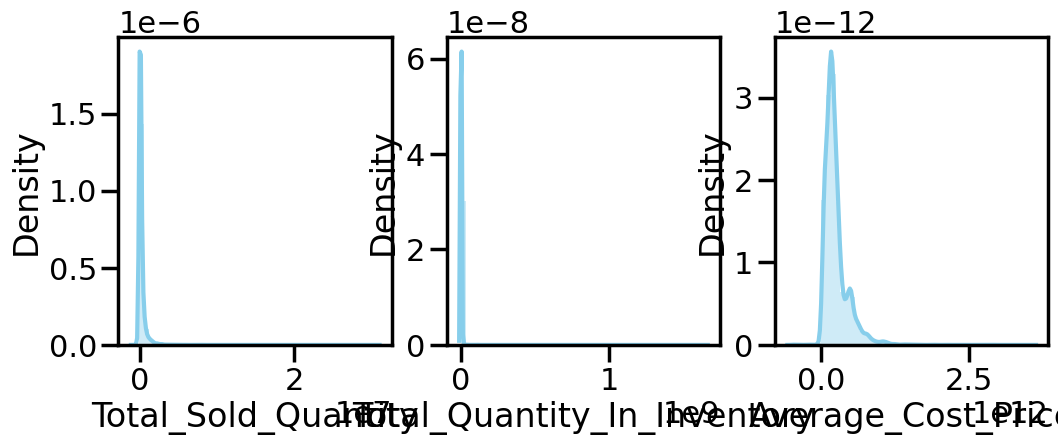

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df['Total_Sold_Quantity'], ax = ax[0])
sns.distplot(df['Total_Quantity_In_Inventory'], ax = ax[1])
sns.distplot(df['Average_Cost_Price'], ax = ax[2])
plt.show()

In [ ]:
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Original distribution
    sns.distplot(df[x], ax=ax[0, 0])

    # Log-transformed distribution (handle values <= 0)
    log_transformed = np.log1p(df[x])  # Use np.log1p to handle values <= 0
    sns.distplot(log_transformed, ax=ax[0, 1])

    # Square root-transformed distribution (handle negative values)
    sqrt_transformed = np.sqrt(df[x] - df[x].min() + 1)  # Handle negative values
    sns.distplot(sqrt_transformed, ax=ax[1, 0])

    # Box-Cox transformed distribution (handle values <= 0)
    boxcox_transformed, _ = stats.boxcox(df[x] - df[x].min() + 1)  # Handle values <= 0
    sns.distplot(boxcox_transformed, ax=ax[1, 1])

    plt.tight_layout()
    plt.show()

    # Print skewness values
    print(f"Original Skewness: {df[x].skew().round(2)}")
    print(f"Log-Transformed Skewness: {log_transformed.skew().round(2)}")
    print(f"Sqrt-Transformed Skewness: {sqrt_transformed.skew().round(2)}")
    print(f"Box-Cox-Transformed Skewness: {pd.Series(boxcox_transformed).skew().round(2)}")

<ipython-input-31-2d7f36893c8f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=ax[0, 0])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-31-2d7f36893c8f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github

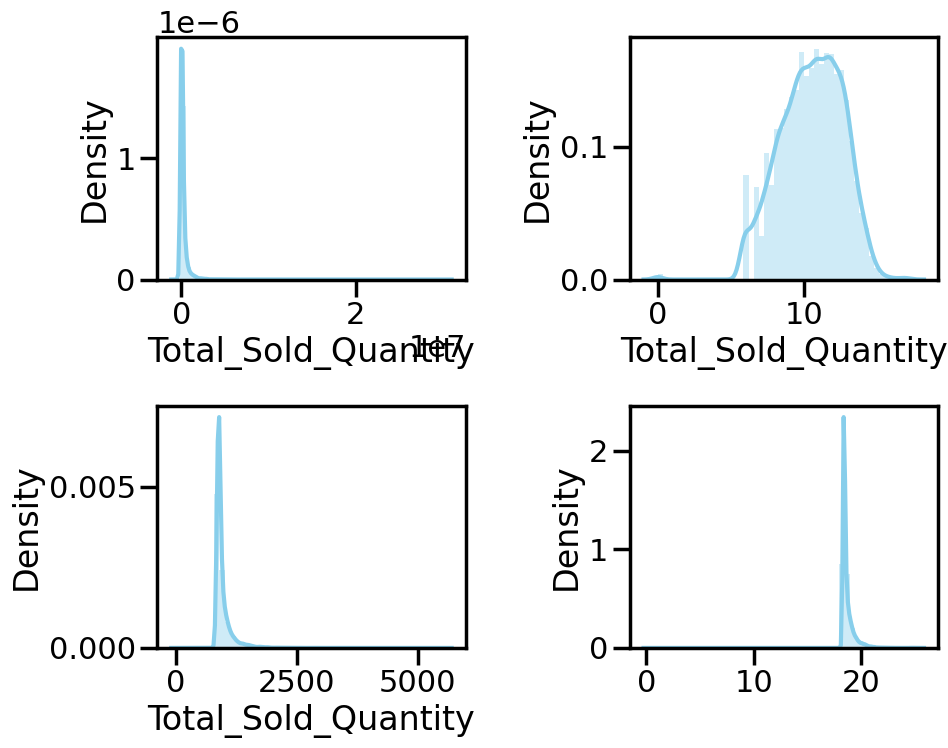

Original Skewness: 19.81
Log-Transformed Skewness: -0.32
Sqrt-Transformed Skewness: 8.6
Box-Cox-Transformed Skewness: 0.63


In [ ]:
analyze_skewness('Total_Sold_Quantity')

<ipython-input-31-2d7f36893c8f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=ax[0, 0])
<ipython-input-31-2d7f36893c8f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_transformed, ax=ax[0, 1])
<ipython-input-31-2d7f36893c8f>:19: UserWarning: 

`distplot` is a deprecated func

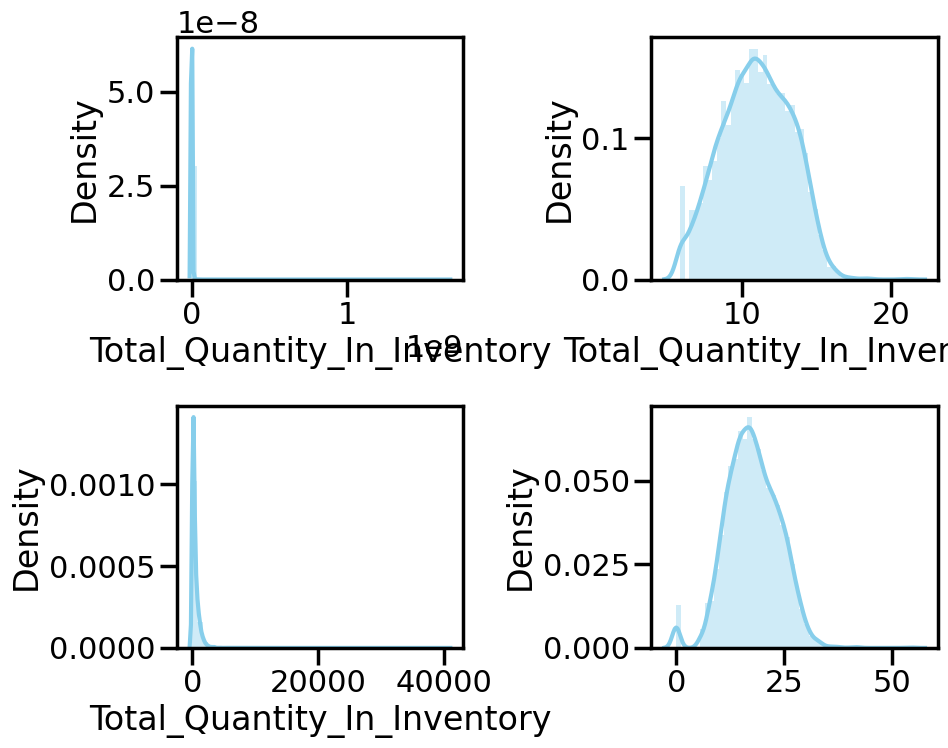

Original Skewness: 53.63
Log-Transformed Skewness: -0.03
Sqrt-Transformed Skewness: 25.17
Box-Cox-Transformed Skewness: 0.04


In [ ]:
analyze_skewness('Total_Quantity_In_Inventory')

<ipython-input-31-2d7f36893c8f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=ax[0, 0])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-31-2d7f36893c8f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github

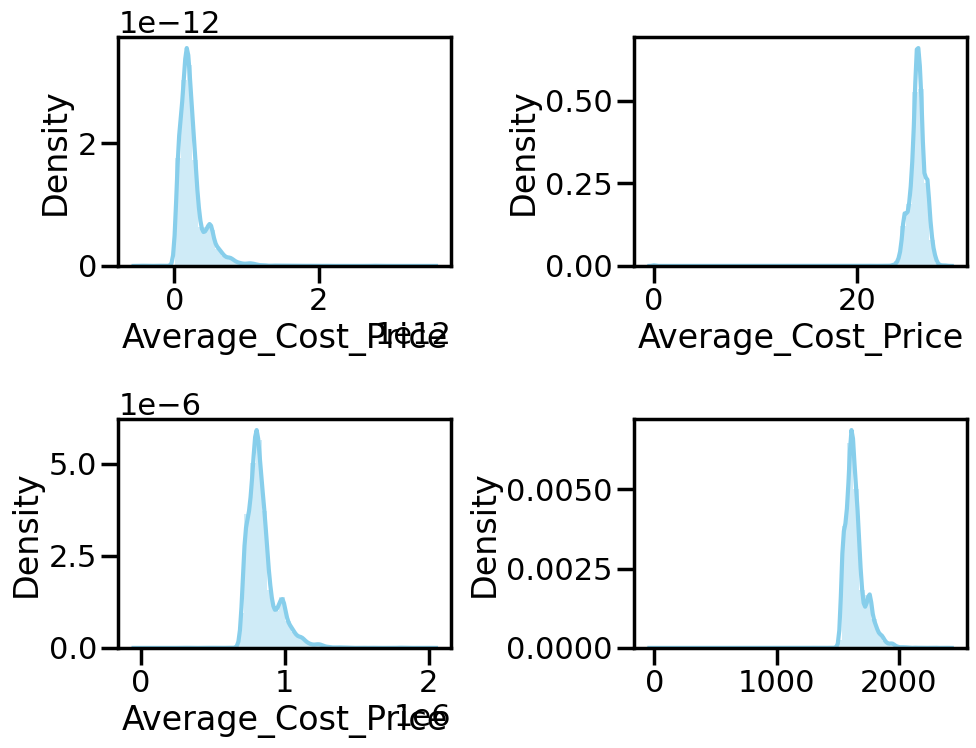

Original Skewness: 3.29
Log-Transformed Skewness: -12.24
Sqrt-Transformed Skewness: 1.83
Box-Cox-Transformed Skewness: 0.64


In [ ]:
analyze_skewness('Average_Cost_Price')


In [ ]:
#Transform
import pandas as pd
import numpy as np
from scipy.stats import boxcox
df_transform = pd.DataFrame()
df_transform['Total_Sold_Quantity'] = boxcox(df['Total_Sold_Quantity'] - df['Total_Sold_Quantity'].min() + 1)[0]
df_transform['Total_Quantity_In_Inventory'] = boxcox(df['Total_Quantity_In_Inventory'] - df['Total_Quantity_In_Inventory'].min() + 1)[0]
df_transform['Average_Cost_Price'] = pd.Series(np.cbrt(df['Average_Cost_Price'])).values
df_transform.head(10)

,Total_Sold_Quantity,Total_Quantity_In_Inventory,Average_Cost_Price
0,18.346748,10.550800,3598.117770
1,18.350993,11.687522,4441.143011
2,18.378764,14.501356,5207.099660
3,18.389592,15.417518,6456.914833
4,18.404482,17.276351,6282.667969
5,18.382936,17.244879,4535.589755
6,18.420888,17.515145,5102.399047
7,18.445768,19.705623,7650.871264
8,18.454879,17.910987,5712.919202
9,18.341927,8.321214,6492.939078


In [ ]:
df_transform.describe()

,Total_Sold_Quantity,Total_Quantity_In_Inventory,Average_Cost_Price
count,11537.000000,11537.000000,11537.000000
mean,18.664975,17.809091,5963.281147
std,0.586758,5.997134,1503.784654
min,0.000000,0.000000,-7770.566256
25%,18.360296,13.669734,5080.814106
50%,18.437691,17.529360,5828.892448
75%,18.734050,22.036313,6679.962553
max,25.561558,54.908847,15223.979636


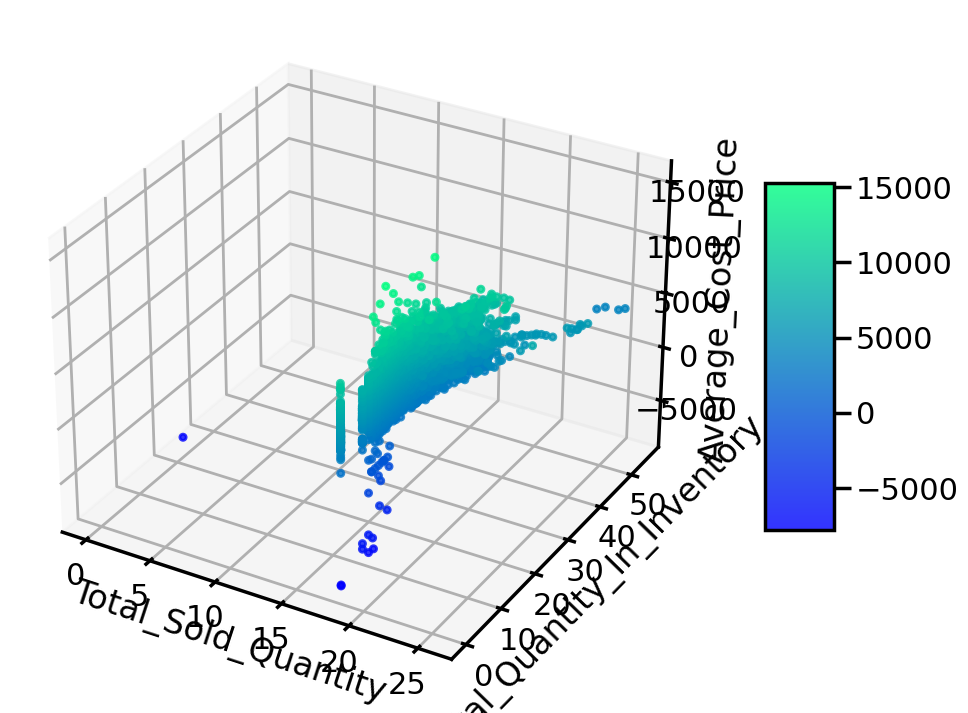

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
y = df_transform['Total_Quantity_In_Inventory']
x = df_transform['Total_Sold_Quantity']
z = df_transform['Average_Cost_Price']
ax.set_xlabel('Total_Sold_Quantity')
ax.set_ylabel('Total_Quantity_In_Inventory')
ax.set_zlabel('Average_Cost_Price')
# Creating color map
my_cmap = plt.get_cmap('winter')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_transform)

df_transform = scaler.transform(df_transform)

In [ ]:
dt = pd.DataFrame(df_transform)
dt['product_id'] = df['product_id']
dt.rename(columns = {'0':'Sold_Quantity','1':'Inventory','2':'Price'})
dt.head(30)

,0,1,2,product_id
0,-0.542371,-1.210346,-1.572875,0018eddc01544dbc9857e8e26ea50b61XNH31
1,-0.535137,-1.020793,-1.012249,009f0f0eee554bcd9db80085537ddaceXMN25
2,-0.487804,-0.551577,-0.502874,0040eff91798499697a833c9b56deac9DEN35
3,-0.469350,-0.398803,0.328275,0021db9bde68471694ecff538475bd56XAM40
4,-0.443972,-0.088836,0.212398,00329f6178fa4fea83077f36e4b835bcREU41
5,-0.480694,-0.094084,-0.949440,00681d6c3efd4f0fb3bc53ab2f7b65f7CAM27
6,-0.416010,-0.049017,-0.572502,00134b14581340878572570a534ec1a3DEN39
7,-0.373606,0.316253,1.122277,00874e03d3424032957bbe1105f23941DOO42
8,-0.358077,0.016992,-0.166495,002d0608fcb547fd82bc8c3f4dc3957eDOO31
9,-0.550588,-1.582137,0.352232,0084d15f56db427d8a56dac2399e001cREU39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

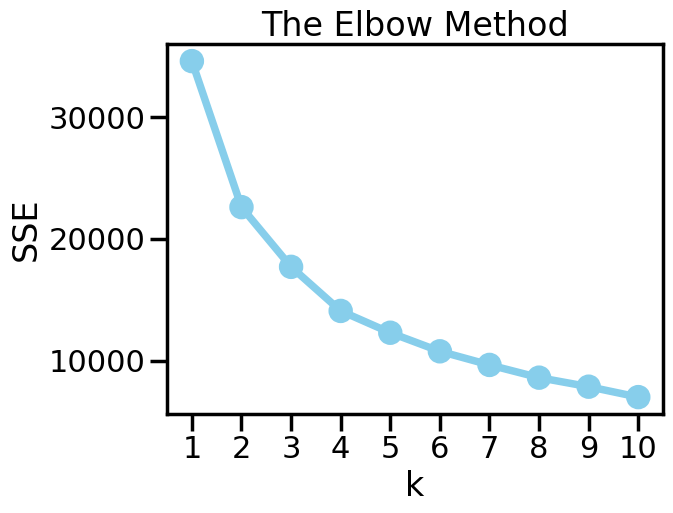

In [ ]:
#Kmeans
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transform)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
for k in range(2,11):
    labels= cluster.KMeans(n_clusters=k,init="k-means++",random_state=42).fit(df_transform).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(metrics.silhouette_score(df_transform,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.4121877414782475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 3 is 0.3207256558893828


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 4 is 0.3365836265189027


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.2967158275511724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.31980007530521476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.32614811919833464


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 8 is 0.3279549398904563


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.30577233427177114


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 10 is 0.30329398176756345


In [ ]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(df_transform)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
df['Cluster'] = model.labels_
df.head()

,product_id,Total_Quantity_In_Inventory,Total_Sold_Quantity,Average_Cost_Price,Cluster
0,0018eddc01544dbc9857e8e26ea50b61XNH31,2520,2520,4.658286e+10,0
1,009f0f0eee554bcd9db80085537ddaceXMN25,4320,4320,8.759600e+10,0
2,0040eff91798499697a833c9b56deac9DEN35,16200,16200,1.411847e+11,0
3,0021db9bde68471694ecff538475bd56XAM40,24480,20880,2.692001e+11,2
4,00329f6178fa4fea83077f36e4b835bcREU41,54720,27360,2.479889e+11,2


In [ ]:
df.to_excel('Clutered_Data.xlsx', index=False)